<a href="https://colab.research.google.com/github/BuczuTex/PRiR/blob/master/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie 1

##Całkowanie numeryczne za pomocą metody prostokątów przy użyciu f(x) = x^2+2 oraz n = 300.

In [ ]:
import tensorflow as tf
import time

def f(x):
  return x*x+2


def calka_prostokat(funkcja, a, b, n):
  a = tf.constant(a, dtype = tf.float64)
  b = tf.constant(b, dtype = tf.float64)
  dx = (b - a)/n
  wynik = 0
  for i in range(1, n + 1):
    wynik = wynik + funkcja(a + i * dx)
  wynik *= dx
  return wynik


start_time = time.time()
wynik_calkowanie = calka_prostokat(tf.function(func = f), 1, 2, 300)
print(f"Wynik całkowania za pomocą metody prostokątów: {wynik_calkowanie} przy czasie {time.time() - start_time}s")

Wynik całkowania za pomocą metody prostokątów: 4.3383351851851835 przy czasie 0.16867780685424805s


Wynik całkowania wynosi 4.3383351851851835.<br>
Czas bez użycia GPU wynosi 0.2563135623931885s<br>
Czas z użyciem GPU wynosi 0.16867780685424805s <br>

##Całkowanie numeryczne za pomocą metody trapezów przy użyciu f(x) = x^2+2 oraz n = 300.

In [ ]:
import tensorflow as tf
import time


def f(x):
  return x*x+2


def calka_trapez(funkcja, a, b, n):
  a = tf.constant(a, dtype = tf.float64)
  b = tf.constant(b, dtype = tf.float64)
  dx = (b - a)/n
  wynik = funkcja(a)/2 + funkcja(b)/2
  for i in range(1, n):
    wynik = wynik + funkcja(a + i*dx)
  wynik *= dx
  return wynik


start_time = time.time()
wynik_calkowanie = calka_trapez(tf.function(func = f), 1, 2, 300)
print(f"Wynik całkowania za pomocą metody prostokątów: {wynik_calkowanie} przy czasie {time.time() - start_time}s")

Wynik całkowania za pomocą metody prostokątów: 4.333335185185184 przy czasie 0.1616497039794922s


Wynik całkowania wynosi 4.333335185185184. <br>
Czas bez użycia GPU wynosi 0.18331170082092285s. <br>
Czas z użyciem GPU wynosi 0.1616497039794922s. <br>



##Całkowanie numeryczne za pomocą metody Simpsona przy użyciu f(x) = x^2+2 oraz n = 300.

In [1]:
import tensorflow as tf
import time

def f(x):
  return x*x+2


def calka_Simpson(funkcja, a, b, n):
  a = tf.constant(a, dtype = tf.float64)
  b = tf.constant(b, dtype = tf.float64)
  dx = 0
  wynik = funkcja(a) + funkcja(b)
  x0 = 0
  x1 = 0
  for i in range(0, n):
    x0 = a + (i * (b - a))/n
    x1 = a + ((i + 1) * (b - a))/n
    wynik += 4 * funkcja((x1 + x0)/2)
    if i == 0:
      dx = (x1 - x0) / 2
  for i in range(1, n):
    wynik += 2 * funkcja(a + (i * (b - a))/n)
  wynik *= dx/3
  return wynik


start_time = time.time()
wynik_calkowanie = calka_Simpson(tf.function(func = f), 1, 2, 300)
print(f"Wynik całkowania za pomocą metody Simpsona: {wynik_calkowanie} przy czasie {time.time() - start_time}s")

Wynik całkowania za pomocą metody Simpsona: 4.333333333333437 przy czasie 6.102625846862793s


Wynik całkowania wynosi 4.333333333333437. <br>
Czas bez użycia GPU wynosi 0.35242676734924316s. <br>
Czas z użyciem GPU wynosi 0.39826393127441406s. <br>
W tym przypadku, użycie GPU skutkuje wydłużonym czasem kompilacji. <br>

# Zadanie 2

## Interpolacja funkcji 1D

In [ ]:
import numpy as np
from tensorflow import keras

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

def funkcja(x):
  return (x-2)*(x+1)*(x-4)
xs = np.arange(-100.0, 100.00025, 0.00025, dtype = float)
ys = []
#Przykłady dla sieci neuronowej do uczenia
for x in xs:
  ys.append(funkcja(x))
ys = np.array(ys, dtype = float)
#Utworzenie sieci neuronowej
model = tf.keras.Sequential([
                             keras.layers.Dense(units = 1, input_shape = [1]),
                             keras.layers.Dense(units = 1000, activation = "relu", input_shape = [1]),
                             keras.layers.Dense(units = 1000, activation = "relu", input_shape = [1]),
                             keras.layers.Dense(units = 1000, activation = "relu", input_shape = [1]),
                             keras.layers.Dense(units = 1000, activation = "relu", input_shape = [1]),
                             keras.layers.Dense(units = 1000, activation = "relu", input_shape = [1]),
                             keras.layers.Dense(units = 1)
                             ])
#Wyznaczenie funkcji optymalizatora i funkcji straty
model.compile(optimizer = 'adam', loss = 'mean_squared_logarithmic_error')
#Trenowanie sieci neuronowej
model.fit(xs, ys, epochs = 100, steps_per_epoch = 500)

Epoch 1/100
500/500 [==============================] - 5s 9ms/step - loss: 4.2651
Epoch 2/100
500/500 [==============================] - 4s 9ms/step - loss: 0.3036
Epoch 3/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0151
Epoch 4/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0061
Epoch 5/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0010
Epoch 6/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0011
Epoch 7/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0016
Epoch 8/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0013
Epoch 9/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0014
Epoch 10/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0016
Epoch 11/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0012
Epoch 12/100
500/500 [==============================] - 4s 9ms/step - loss: 0.0015
Epoch 13/100


Output

In [ ]:
x = input("Proszę podać x: ")
print(f"Wynik dla danego x:", model.predict([float(x)]))

Proszę podać x: 12
Wynik dla danego x: [[1037.1472]]


##Interpolacja funkcji 2D

In [ ]:
from math import sin, sqrt, pow

import numpy as np
from tensorflow import keras

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf


def funkcja(x, y):
  return sin(sqrt(pow(x, 2) + pow(y, 2)))/sqrt(pow(x, 2) + pow(y, 2))

xs2 = np.arange(-40.0, 40.1, 0.1, dtype = float)
ys2 = np.arange(-40.0, 40.1, 0.1, dtype = float)
zs = []
xy = []
for x,y in zip(xs2, ys2):
  zs.append(funkcja(x, y))
  xy.append([x, y])
xy = np.asarray(xy, dtype = float)
zs = np.asarray(zs, dtype = float)
model2 = tf.keras.Sequential([
                             keras.layers.Dense(1000, input_shape = [2]),
                             keras.layers.Dense(1000),
                             keras.layers.Dense(1000),
                             keras.layers.Dense(1000),
                             keras.layers.Dense(1000),
                             keras.layers.Dense(1)
                             ])
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.fit(xy, zs, epochs = 500)

Epoch 1/500
26/26 [==============================] - 0s 3ms/step - loss: 4991.4203
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 79.0620
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 4.2287
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 0.1385
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0393
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0357
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0354
Epoch 11/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0341
Epoch 12/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0278
Epoch 13/500
26/26 [=============

Output

In [ ]:
x = input("Proszę podać x: ")
y = input("Proszę podać y: ")
print("Wynik dla wyznaczonego x i y wynosi:", model2.predict([[float(x), float(y)]]))

Proszę podać x: 5
Proszę podać y: 5
Wynik dla wyznaczonego x i y wynosi: [[0.02731668]]


#Zadanie 3

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils

fashion_mnist = tf.keras.datasets.fashion_mnist


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(24, kernel_size=3, activation='relu',padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size = 128, verbose = 1)

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.8444 - accuracy: 0.6919
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3699 - accuracy: 0.8667
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3062 - accuracy: 0.8872
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2701 - accuracy: 0.9007
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2445 - accuracy: 0.9091
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2132 - accuracy: 0.9210
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1955 - accuracy: 0.9285
Epoch 8/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1785 - accuracy: 0.9339
Epoch 9/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1667 - accuracy: 0.9374
Epoch 10/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1516 - accura

In [ ]:
predictions = model.predict(test_images)

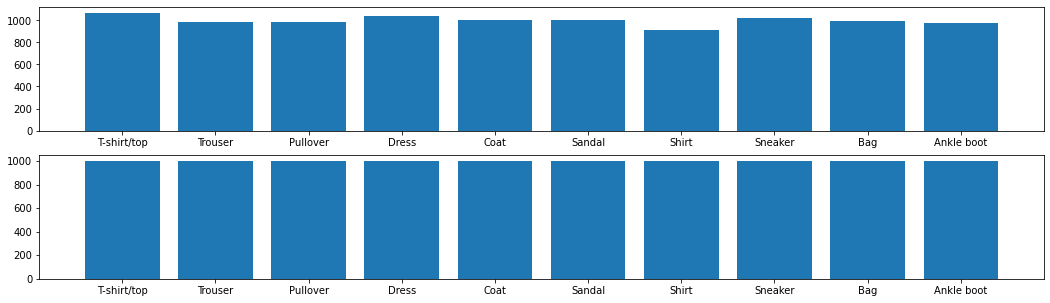

In [ ]:
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

height = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
height2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for prediction, label in zip(predictions, test_labels):
  height[np.argmax(prediction)] += 1
  height2[np.argmax(label)] += 1

fig, axs = plt.subplots(2, figsize = (18, 5))
axs[0].bar(names, height)
axs[1].bar(names, height2)
plt.show()